In [1]:
import sys
sys.path.append('../../')
import pandas as pd
import seaborn as sns; sns.set(style='ticks', context='paper',
                               rc={'font.size': 6, 
                                   'axes.titlesize': 7,
                                   'axes.labelsize': 7,
                                   'axes.labelpad': 2,
                                   'xtick.labelsize': 5,
                                   'ytick.labelsize': 5,
                                   'legend.fontsize' : 5.5,
                                   'legend.title_fontsize' : 7,
                                   'legend.markerscale': 0.5,
                                   'axes.spines.top': False,
                                   'axes.spines.right': False,
                                   'axes.linewidth': 0.4,
                                   'xtick.major.width': 0.4,
                                   'ytick.major.width': 0.4,
                                   'xtick.major.size': 2.5,
                                   'ytick.major.size': 2.5,
                                   'xtick.minor.size': 1.5,
                                   'ytick.minor.size': 1.5,
                                   'xtick.minor.width': 0.2,
                                   'ytick.minor.width': 0.2,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt
from theory_simulation.gaussian_ellipsoids import run_simulation

In [2]:
eds_ecological = [3, 5, 8, 12, 16, 20]
eds_experimental = [3, 8, 20]

data_eco = pd.DataFrame()
for ed_eco in eds_ecological:
    data_eco = data_eco.append(run_simulation(ed_eco=ed_eco, n_repeats=100))
data_eco = data_eco.astype({'ed_eco': int})

data_exp = pd.DataFrame()
for dim_exp in eds_experimental:
    data_exp = data_exp.append(run_simulation(dim_exp=dim_exp, n_repeats=100))

100%|██████████| 10/10 [01:03<00:00,  6.33s/it]


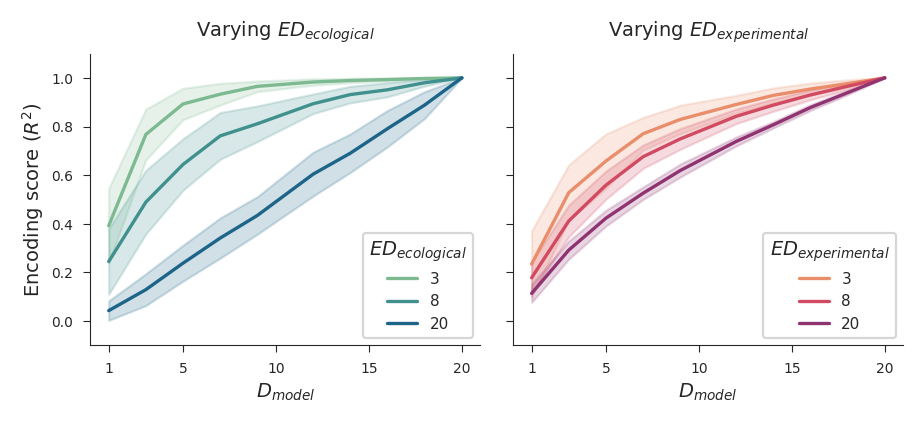

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(4.5, 2))

sns.lineplot(data=data_eco[data_eco.ed_eco.isin([3, 8, 20])], x='dim_model', y='r2', hue='ed_eco',
             ci='sd', palette=sns.color_palette('crest')[:6:2], ax=axs[0])
axs[0].legend(loc='lower right', title=r'$ED_{ecological}$')

sns.lineplot(data=data_exp, x='dim_model', y='r2', hue='dim_exp',
             ci='sd', palette=sns.color_palette('flare')[:6:2], ax=axs[1])
axs[1].legend(loc='lower right', title=r'$ED_{experimental}$')

axs[0].set(title=r'Varying $ED_{ecological}$', xlabel=r'$D_{model}$', ylabel=r'Encoding score ($R^2$)', xlim=(0, 21), ylim=(-0.1, 1.1), xticks=[1, 5, 10, 15, 20])
axs[1].set(title=r'Varying $ED_{experimental}$', xlabel=r'$D_{model}$', ylabel=None, xlim=(0, 21), ylim=(-0.1, 1.1), xticks=[1, 5, 10, 15, 20])
axs[1].axes.yaxis.set_ticklabels([])

plt.show()

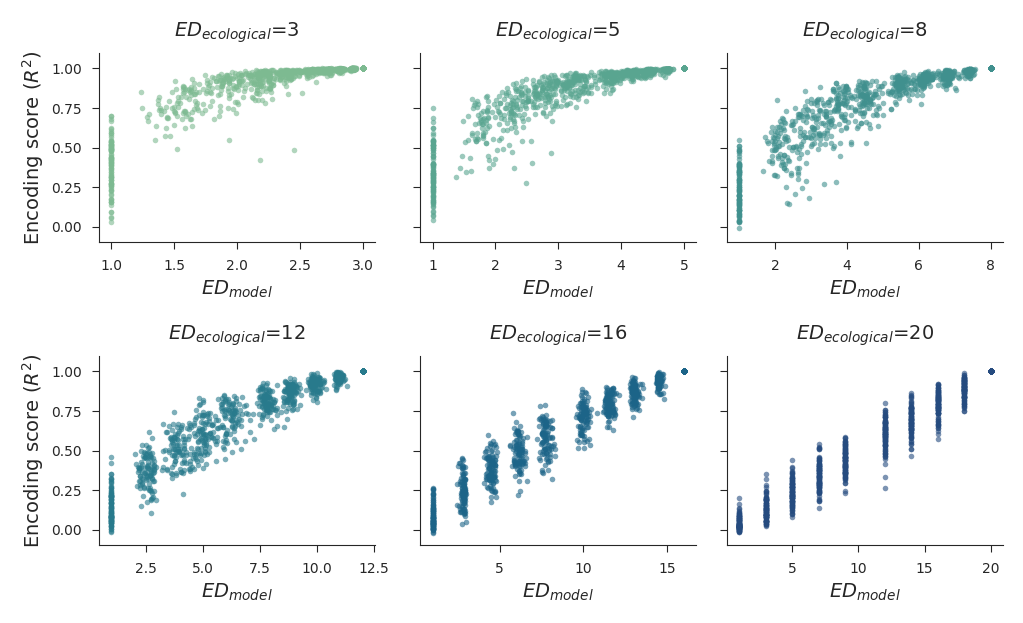

In [4]:
fig, axs = plt.subplots(2, 3, figsize=(5, 3))

for i, ed_eco in enumerate(eds_ecological):
    sns.scatterplot(data=data_eco[data_eco.ed_eco == ed_eco], 
                    x='ed_model', y='r2', 
                    s=4, linewidth=0, alpha=0.6,
                    color=sns.color_palette('crest')[i], 
                    ax=axs[i // 3, i % 3])

axs[0, 0].set(title=r'$ED_{ecological}$=' + str(eds_ecological[0]), xlabel=r'$ED_{model}$', ylabel=r'Encoding score ($R^2$)', ylim=(-0.1, 1.1))
axs[0, 1].set(title=r'$ED_{ecological}$=' + str(eds_ecological[1]), xlabel=r'$ED_{model}$', ylabel=None, ylim=(-0.1, 1.1))
axs[0, 2].set(title=r'$ED_{ecological}$=' + str(eds_ecological[2]), xlabel=r'$ED_{model}$', ylabel=None, ylim=(-0.1, 1.1))
axs[1, 0].set(title=r'$ED_{ecological}$=' + str(eds_ecological[3]), xlabel=r'$ED_{model}$', ylabel=r'Encoding score ($R^2$)', ylim=(-0.1, 1.1))
axs[1, 1].set(title=r'$ED_{ecological}$=' + str(eds_ecological[4]), xlabel=r'$ED_{model}$', ylabel=None, ylim=(-0.1, 1.1))
axs[1, 2].set(title=r'$ED_{ecological}$=' + str(eds_ecological[5]), xlabel=r'$ED_{model}$', ylabel=None, ylim=(-0.1, 1.1))
axs[0, 1].axes.yaxis.set_ticklabels([])
axs[0, 2].axes.yaxis.set_ticklabels([])
axs[1, 1].axes.yaxis.set_ticklabels([])
axs[1, 2].axes.yaxis.set_ticklabels([])

plt.show()